___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.                                                         0-1 arasında değişen çalışan memnuniyet noktasıdır.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.                       Yine 0-1 arasında işveren tarafından değerlendirilen çalışan performansi.
- ***number_projects:*** How many of projects assigned to an employee?                                                                                            Bir çalışana kaç proje atandı? 
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month? Bir çalışan ayda ortalama kaç saat çalıştı?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.      (çalışan deneyimi)Bir çalışanın şirkette geçirdiği yıl sayısı.
- ***work_accident:*** Whether an employee has had a work accident or not. Çalışanın iş kazası geçirip geçirmediği.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not. Bir çalışanın son 5 yılda terfi alıp almadığı.
- ***Departments:*** Employee's working department/division. Çalışanın çalışma bölümü. 
- ***Salary:*** Salary level of the employee such as low, medium and high. Çalışanın düşük, orta ve yüksek olarak maaş düzeyi.
- ***left:*** Whether the employee has left the company or not. Çalışanın şirketten ayrılıp ayrılmadığı.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

***Kullanilmasi önerilen modeller***

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
import sklearn
print(sklearn.__version__)

1.1.2


### Importing Modules

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
import datetime as dt
from datetime import datetime

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [3]:
df = pd.read_csv("HR_Dataset.csv")

In [4]:
df.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Departments,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [5]:
df.info()
# missing value yok. 2 feature haric digerleri numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
print('Percentage of NaN Values:')
print('-------------------------')
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing value yok

Percentage of NaN Values:
-------------------------


satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Departments              0.0
salary                   0.0
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
df.describe().T.style.background_gradient(
    subset=['mean', 'std', '50%', 'count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.000000,0.612834,0.248631,0.090000,0.440000,0.640000,0.820000,1.000000
last_evaluation,14999.000000,0.716102,0.171169,0.360000,0.560000,0.720000,0.870000,1.000000
number_project,14999.000000,3.803054,1.232592,2.000000,3.000000,4.000000,5.000000,7.000000
average_montly_hours,14999.000000,201.050337,49.943099,96.000000,156.000000,200.000000,245.000000,310.000000
time_spend_company,14999.000000,3.498233,1.460136,2.000000,3.000000,3.000000,4.000000,10.000000
Work_accident,14999.000000,0.144610,0.351719,0.000000,0.000000,0.000000,0.000000,1.000000
left,14999.000000,0.238083,0.425924,0.000000,0.000000,0.000000,0.000000,1.000000
promotion_last_5years,14999.000000,0.021268,0.144281,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Departments,14999,10,sales,4140
salary,14999,3,low,7316


In [10]:
numerical = df.select_dtypes(exclude='object')
numerical.sample(3)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
4567,0.66,0.81,2,201,3,0,0,0
5227,0.64,0.65,3,181,2,0,0,0
11464,0.49,0.66,3,155,3,0,0,1


In [11]:
categorical = df.select_dtypes(include='object')
categorical.sample(3)


,Departments,salary
5629,support,medium
5786,management,medium
826,IT,low


In [12]:
print('Number of Duplicated Values:', df.duplicated().sum())
print('---------------------------------')

Number of Duplicated Values: 3008
---------------------------------


In [13]:
df.drop_duplicates(inplace=True)  # Veri kümesinde, yinelenen gözlemlerin silinmesinden sonra 10 sütun ve 11991 gözlem kaldi.

In [14]:
df.nunique().sort_values(ascending=False)

average_montly_hours     215
satisfaction_level        92
last_evaluation           65
Departments               10
time_spend_company         8
number_project             6
salary                     3
Work_accident              2
left                       2
promotion_last_5years      2
dtype: int64

In [15]:
df.rename({'Departments ': 'department',
          "Work_accident": "work_accident"}, axis=1, inplace=True)
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


### Data Insights

Verilen veri setinde, şirkette kalan ve şirketten ayrılan iki tür çalışanımız var. Böylece verileri iki gruba ayırabilir ve özelliklerini karşılaştırabiliriz. Ayrıca groupby() ve ortalama() fonksiyonlarını kullanarak her iki grubun ortalamasını bulabiliriz.

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [17]:
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
'average_montly_hours', 'time_spend_company', 'work_accident',
'promotion_last_5years', 'department', 'salary', 'left']]
df.head(1)
# target ==> son future'a

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1


In [18]:
df_remain = df[df.left == 0]
df_remain.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0


In [19]:
df_churn = df[df.left == 1]
df_churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [20]:
df_remain.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.667365,0.715667,3.786800,198.942700,3.262000,0.174500,0.019500,0.0
std,0.217082,0.161919,0.981755,45.665507,1.367239,0.379558,0.138281,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.0
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,0.0


In [21]:
df_churn.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.0
mean,0.440271,0.721783,3.883476,208.162230,3.881467,0.052737,0.004018,1.0
std,0.265207,0.197436,1.817139,61.295145,0.974041,0.223565,0.063277,0.0
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.0
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,0.000000,1.0
75%,0.730000,0.910000,6.000000,262.500000,5.000000,0.000000,0.000000,1.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


In [22]:
df_remain.time_spend_company.value_counts()

3     4316
2     2879
4     1510
5      580
6      433
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [23]:
df_churn.time_spend_company.value_counts()


3    874
4    495
5    482
6    109
2     31
Name: time_spend_company, dtype: int64

In [24]:
df_remain.groupby('time_spend_company').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,work_accident,promotion_last_5years,left
time_spend_company,,,,,,,
2,0.700907,0.717603,3.681834,199.742966,0.173324,0.013546,0.0
3,0.697020,0.717157,3.729379,199.219416,0.169370,0.019231,0.0
4,0.637901,0.720444,3.912583,198.607285,0.164238,0.013907,0.0
5,0.479121,0.702362,4.215517,193.331034,0.212069,0.017241,0.0
6,0.513880,0.693025,4.057737,200.050808,0.193995,0.025404,0.0
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.191489,0.0
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.061728,0.0
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.074766,0.0


In [25]:
df_churn.groupby('time_spend_company').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,work_accident,promotion_last_5years,left
time_spend_company,,,,,,,
2,0.537419,0.753548,3.967742,209.870968,0.032258,0.000000,1.0
3,0.411796,0.522243,2.116705,147.475973,0.052632,0.006865,1.0
4,0.144505,0.857798,5.981818,268.856566,0.056566,0.002020,1.0
5,0.708402,0.899564,4.763485,248.153527,0.053942,0.002075,1.0
6,0.798440,0.908899,4.605505,241.807339,0.036697,0.000000,1.0


In [26]:
df_remain.number_project.value_counts()


3    3482
4    3448
5    1890
2     725
6     455
Name: number_project, dtype: int64

In [27]:
df_churn.number_project.value_counts()

2    857
6    371
5    343
4    237
7    145
3     38
Name: number_project, dtype: int64

In [28]:
df_remain.groupby('number_project').mean()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
number_project,,,,,,,
2,0.601586,0.663545,186.880000,3.380690,0.180690,0.019310,0.0
3,0.690640,0.716893,197.177197,3.136990,0.177484,0.017806,0.0
4,0.689983,0.725044,201.241879,3.191705,0.166473,0.021462,0.0
5,0.657614,0.723116,202.706349,3.348148,0.176720,0.017460,0.0
6,0.463165,0.687341,198.617582,4.204396,0.193407,0.026374,0.0


In [29]:
df_churn.groupby('number_project').mean()


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
number_project,,,,,,,
2,0.412345,0.517888,146.143524,3.022170,0.052509,0.005834,1.0
3,0.577368,0.765263,212.052632,3.842105,0.026316,0.000000,1.0
4,0.756793,0.890464,242.143460,4.881857,0.075949,0.008439,1.0
5,0.745773,0.898601,244.495627,5.014577,0.046647,0.000000,1.0
6,0.132561,0.861698,269.361186,4.094340,0.061995,0.002695,1.0
7,0.116690,0.863517,275.620690,4.110345,0.013793,0.000000,1.0


Ayrilanlarin aylik ortalama calisma süresi(average monthly hour) daha fazla ve terfi alma süre ortalamasinin(promotion last 5 years) da daha gec oldugu görülüyor.

In [30]:
pd.DataFrame(df_remain.average_montly_hours.value_counts().sort_index(ascending=False))

,average_montly_hours
287,13
286,23
285,15
284,11
283,11
...,...
100,17
99,11
98,20
97,13


In [31]:
pd.DataFrame(df_churn.average_montly_hours.value_counts().sort_index(ascending=False))

,average_montly_hours
310,14
309,7
308,10
307,10
306,8
...,...
130,25
129,27
128,27
127,29


In [32]:
len(df_churn[(df_churn['average_montly_hours'] > 287)])

184

In [33]:
len(df_remain[(df_remain['average_montly_hours'] > 287)])


0

Ayrilan çalışanların bir ay içinde kalan çalışanlardan çok daha fazla çalıştığını görebiliyorum

In [34]:
df_remain[df_remain.average_montly_hours > 200]['department'].value_counts(normalize=True)

sales          0.273792
technical      0.181501
support        0.151490
IT             0.079548
RandD          0.059609
marketing      0.056526
product_mng    0.055910
accounting     0.051182
hr             0.049743
management     0.040699
Name: department, dtype: float64

In [35]:
df_churn[df_churn.average_montly_hours > 200]['department'].value_counts(normalize=True)


sales          0.271045
technical      0.211841
support        0.159112
IT             0.077706
accounting     0.055504
product_mng    0.053654
marketing      0.052729
hr             0.046253
RandD          0.045328
management     0.026827
Name: department, dtype: float64

In [36]:
df_remain.promotion_last_5years.value_counts()

0    9805
1     195
Name: promotion_last_5years, dtype: int64

In [37]:
df_remain.promotion_last_5years.value_counts(normalize=True)

0    0.9805
1    0.0195
Name: promotion_last_5years, dtype: float64

In [38]:
df_churn.promotion_last_5years.value_counts()

0    1983
1       8
Name: promotion_last_5years, dtype: int64

In [39]:
df_churn.promotion_last_5years.value_counts(normalize=True)

0    0.995982
1    0.004018
Name: promotion_last_5years, dtype: float64

In [40]:
print('Percentage of churn employees promoted in the last five years    : %',
      round(df_churn.promotion_last_5years.value_counts(normalize=True)[1]*100, 2))
print('Percentage of remaining employees promoted in the last five years: %',
      df_remain.promotion_last_5years.value_counts(normalize=True)[1]*100)


Percentage of churn employees promoted in the last five years    : % 0.4
Percentage of remaining employees promoted in the last five years: % 1.95


Son beş yılda terfi ettirilen ayrilan çalışanların yüzdesi, kalan çalışanların yüzdesinden daha küçük.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [41]:
df['left'].value_counts()


0    10000
1     1991
Name: left, dtype: int64

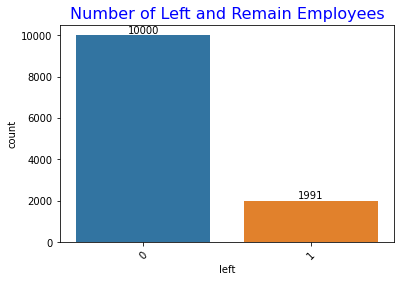

In [42]:
ax = sns.countplot(data=df, x='left')
ax.set_title('Number of Left and Remain Employees', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
    ax.bar_label(container)

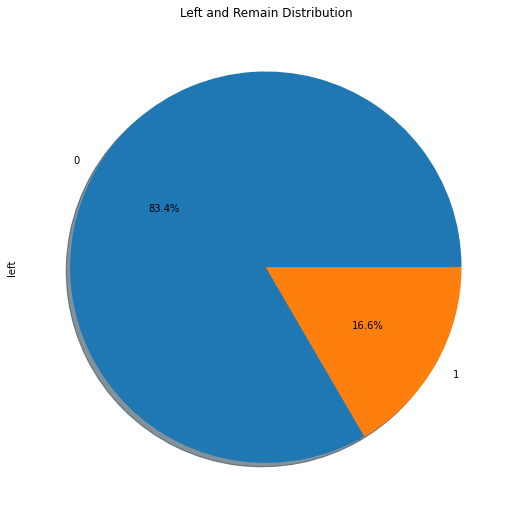

In [43]:
plt.figure(figsize=(20, 9))
df.left.value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Left and Remain Distribution')
plt.show()


'left' sütunda iki tür değer var. Dengesiz bir verimiz var.

Çalışanların yaklaşık %17'si (1991 çalışan) şirkete devam etmemiş ve ayrılmıştır.

Çalışanların yaklaşık %83'ü (10000 çalışan) şirkete devam ediyor ve ayrılmadı.

Promotion Status

In [44]:
df.promotion_last_5years.value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [45]:
df.groupby('left')['promotion_last_5years'].value_counts()

left  promotion_last_5years
0     0                        9805
      1                         195
1     0                        1983
      1                           8
Name: promotion_last_5years, dtype: int64

In [46]:
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True)

left  promotion_last_5years
0     0                        0.980500
      1                        0.019500
1     0                        0.995982
      1                        0.004018
Name: promotion_last_5years, dtype: float64

Son beş yılda terfi ettirilen ve ayrilmis olan çalışanların yüzdesi, kalan çalışanların yüzdesinden daha küçüktür. Bu, çalışanların şirketten ayrılmalarının bir nedeni olabilir.

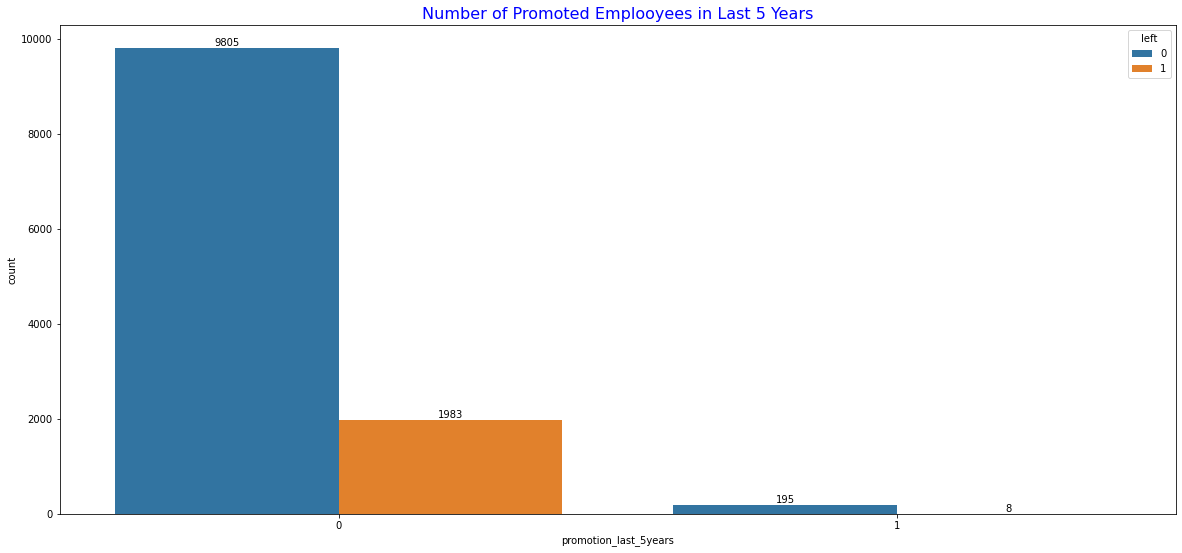

In [47]:
plt.figure(figsize=(20, 9))
ax = sns.countplot(data=df, x='promotion_last_5years', hue='left')
ax.set_title('Number of Promoted Emplooyees in Last 5 Years', fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)

years of experience

In [48]:
df.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [49]:
df.groupby('left')['time_spend_company'].value_counts()

left  time_spend_company
0     3                     4316
      2                     2879
      4                     1510
      5                      580
      6                      433
      10                     107
      7                       94
      8                       81
1     3                      874
      4                      495
      5                      482
      6                      109
      2                       31
Name: time_spend_company, dtype: int64

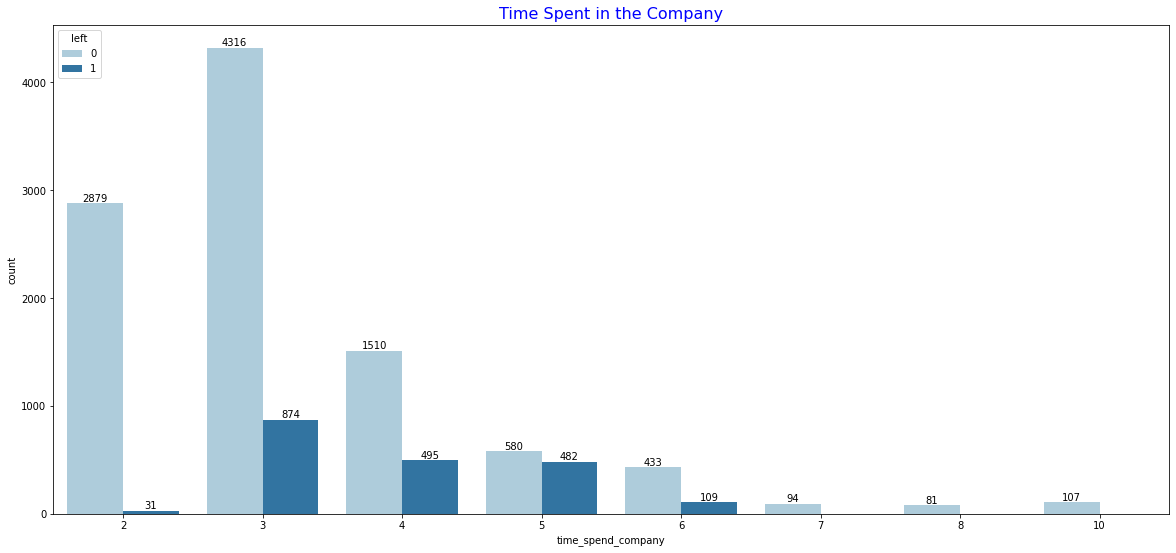

In [50]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='time_spend_company', hue='left', palette=palette)
ax.set_title('Time Spent in the Company',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

Genelde 2 ve 6 yıl arasında çalışanlarin, özellikle 3. yıllarında şirketten ayrılmislar.

In [51]:
df[(df['time_spend_company'] == 3)][['satisfaction_level', 'last_evaluation']].mean()


satisfaction_level    0.648988
last_evaluation       0.684333
dtype: float64

In [52]:
df[(df['time_spend_company'] == 3)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.697020,0.717157,3.729379,199.219416,3.0,0.169370,0.019231
1,0.411796,0.522243,2.116705,147.475973,3.0,0.052632,0.006865


In [53]:
df[(df['time_spend_company'] == 4)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.637901,0.720444,3.912583,198.607285,4.0,0.164238,0.013907
1,0.144505,0.857798,5.981818,268.856566,4.0,0.056566,0.002020


In [54]:
df[(df['time_spend_company'] == 5)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.479121,0.702362,4.215517,193.331034,5.0,0.212069,0.017241
1,0.708402,0.899564,4.763485,248.153527,5.0,0.053942,0.002075


İki grup için; 3., 4. ve 5. yıllarda göze çarpan fark, son beş yıldaki promosyon farkıdır. 4. ve 5. yıllarda, ayrilan çalışanların aylık ortalama çalışma saatleri daha yüksektir.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [55]:
df.number_project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

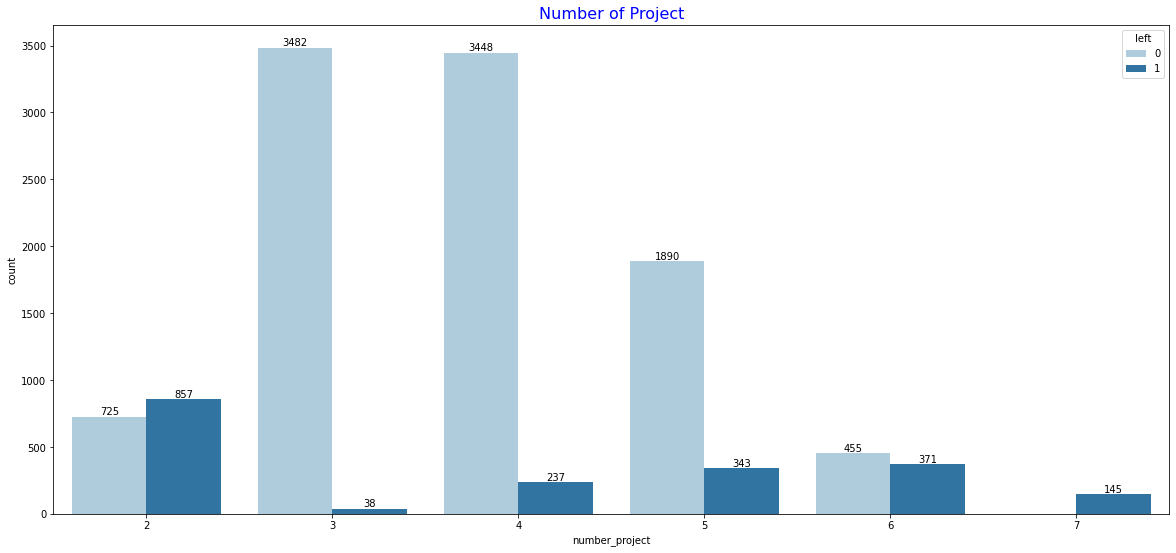

In [56]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='number_project',
                   hue='left', palette=palette)
ax.set_title('Number of Project',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [57]:
df.groupby('left')['number_project'].value_counts(normalize=True)


left  number_project
0     3                 0.348200
      4                 0.344800
      5                 0.189000
      2                 0.072500
      6                 0.045500
1     2                 0.430437
      6                 0.186339
      5                 0.172275
      4                 0.119036
      7                 0.072828
      3                 0.019086
Name: number_project, dtype: float64

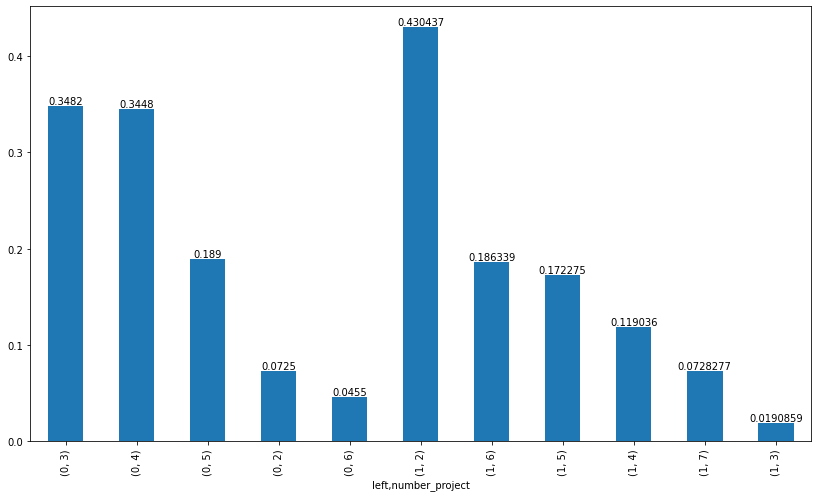

In [58]:
ax = df.groupby('left')['number_project'].value_counts(normalize=True).plot(kind='bar', figsize=(14,8))
for container in ax.containers:ax.bar_label(container)
plt.show()

### Subplots of Features

You can use the methods of the matplotlib.

In [60]:
df.groupby('left')['salary'].value_counts()

left  salary
0     low       4566
      medium    4492
      high       942
1     low       1174
      medium     769
      high        48
Name: salary, dtype: int64

In [61]:
df.groupby('left')['salary'].value_counts(normalize=True)

left  salary
0     low       0.456600
      medium    0.449200
      high      0.094200
1     low       0.589653
      medium    0.386238
      high      0.024108
Name: salary, dtype: float64

Salary can be a reason too for the emplooyes to leave the company.

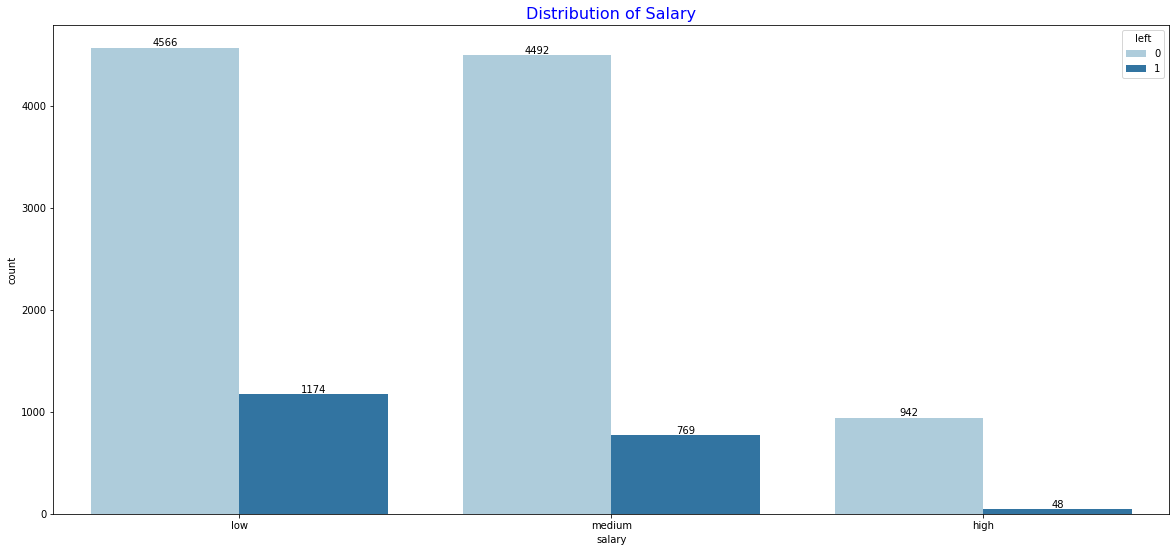

In [62]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='salary',
                   hue='left', palette=palette)
ax.set_title('Distribution of Salary',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()


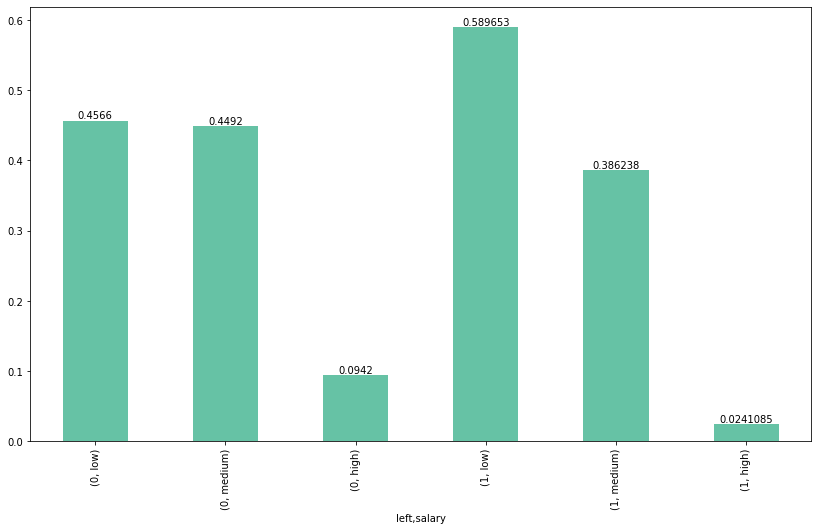

In [63]:
ax = df.groupby('left')['salary'].value_counts(
    normalize=True).plot(kind='bar', figsize=(14, 8), colormap='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


(0.0, 100.0)

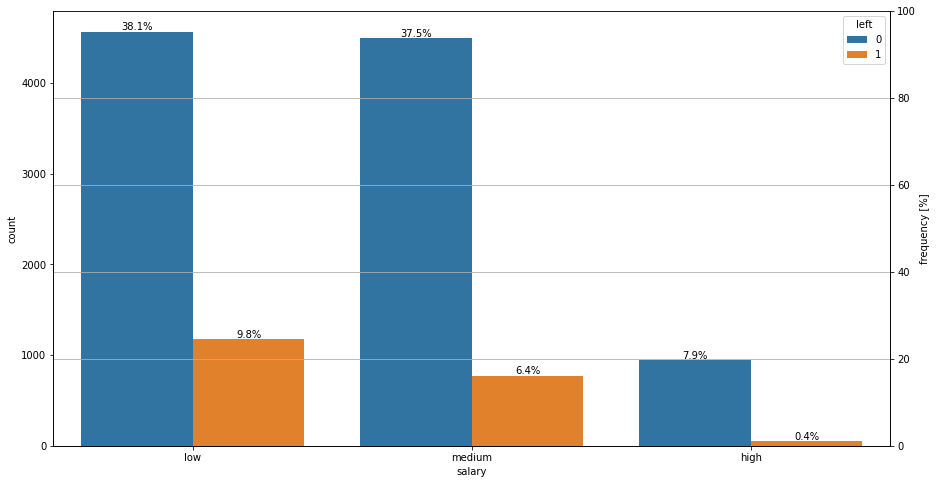

In [64]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='salary', hue='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0, 100)


average monthly hours:

In [1]:
df.groupby('left')['average_montly_hours'].mean()

NameError: name 'df' is not defined

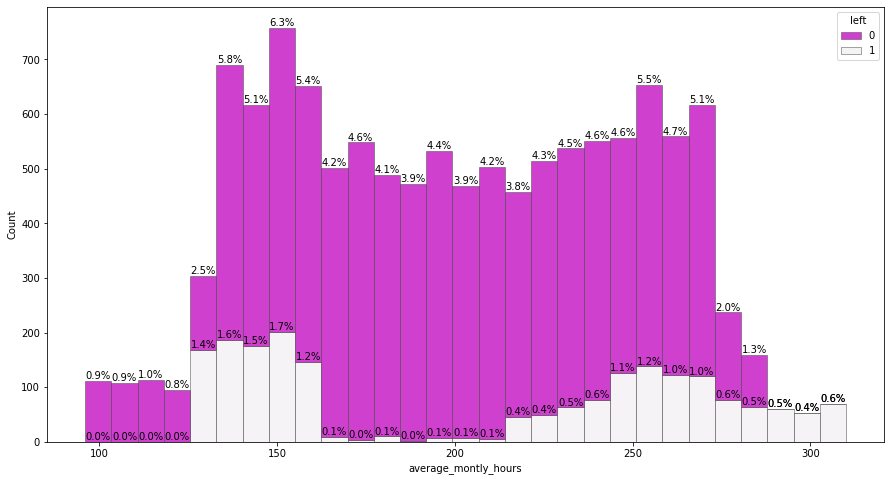

In [65]:
plt.figure(figsize=(15, 8))
fig = sns.histplot(
    df,
    x="average_montly_hours", hue="left",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
for p in fig.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text


#### İş yükünde ayrilma eğilimi beş aşamadan oluşur

Ayda 125 saatin altında ayrilma yok

125-160 saat/ay ayrilma oranı en yüksek

160-220 saat/ay ayrilma oranı çok düşük(ihmal edilebilir)

220-290 saat/ay ayrilma oranı yüksek(çan şeklinde)

220 saat/ay üzerinde ayrilma oranı % 100!!!

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [66]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,0.173295
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,-0.125436
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.044657
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.000000


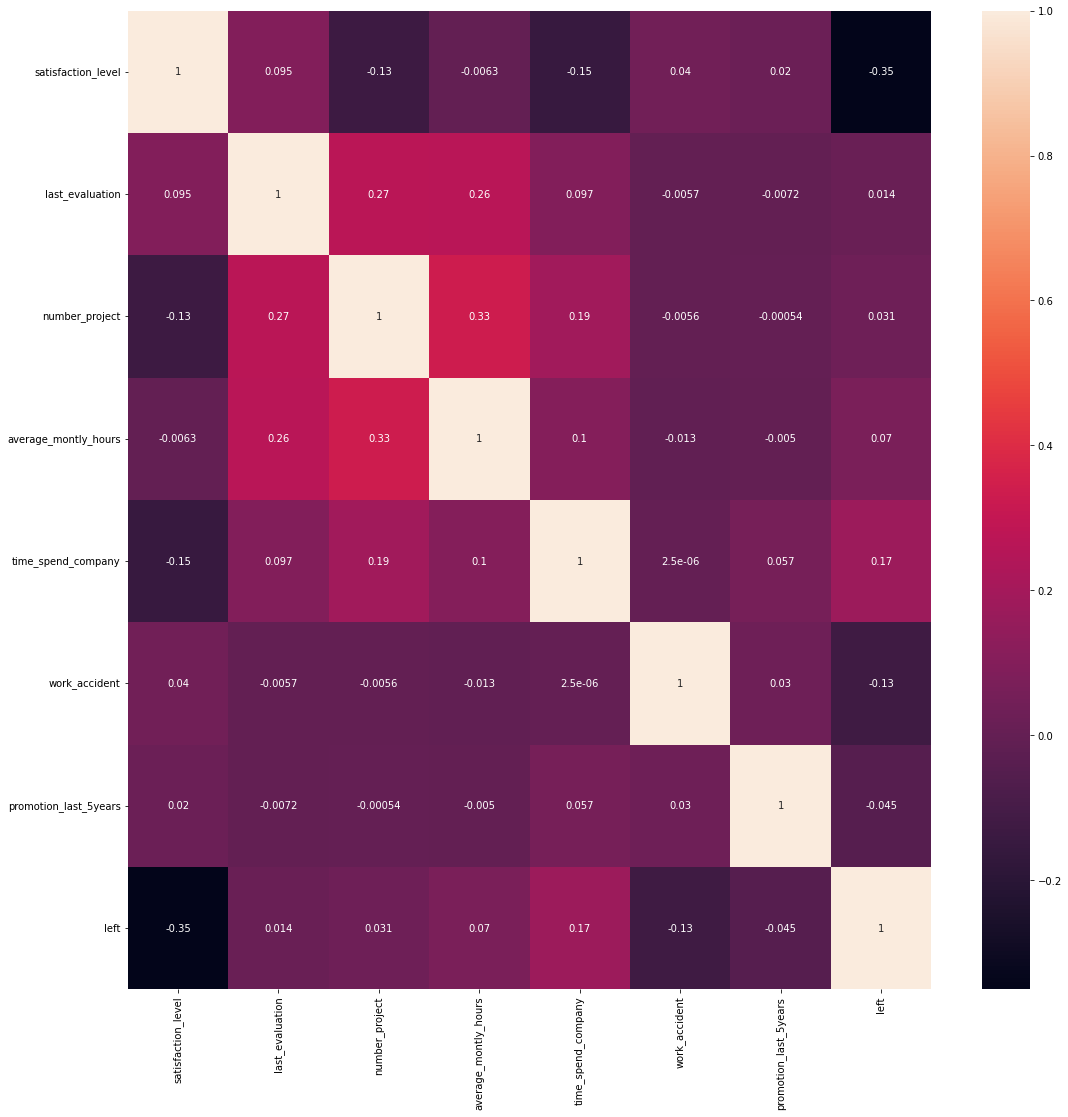

In [67]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0)
plt.show()


In [68]:
def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,0.173295
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,-0.125436
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.044657
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.000000


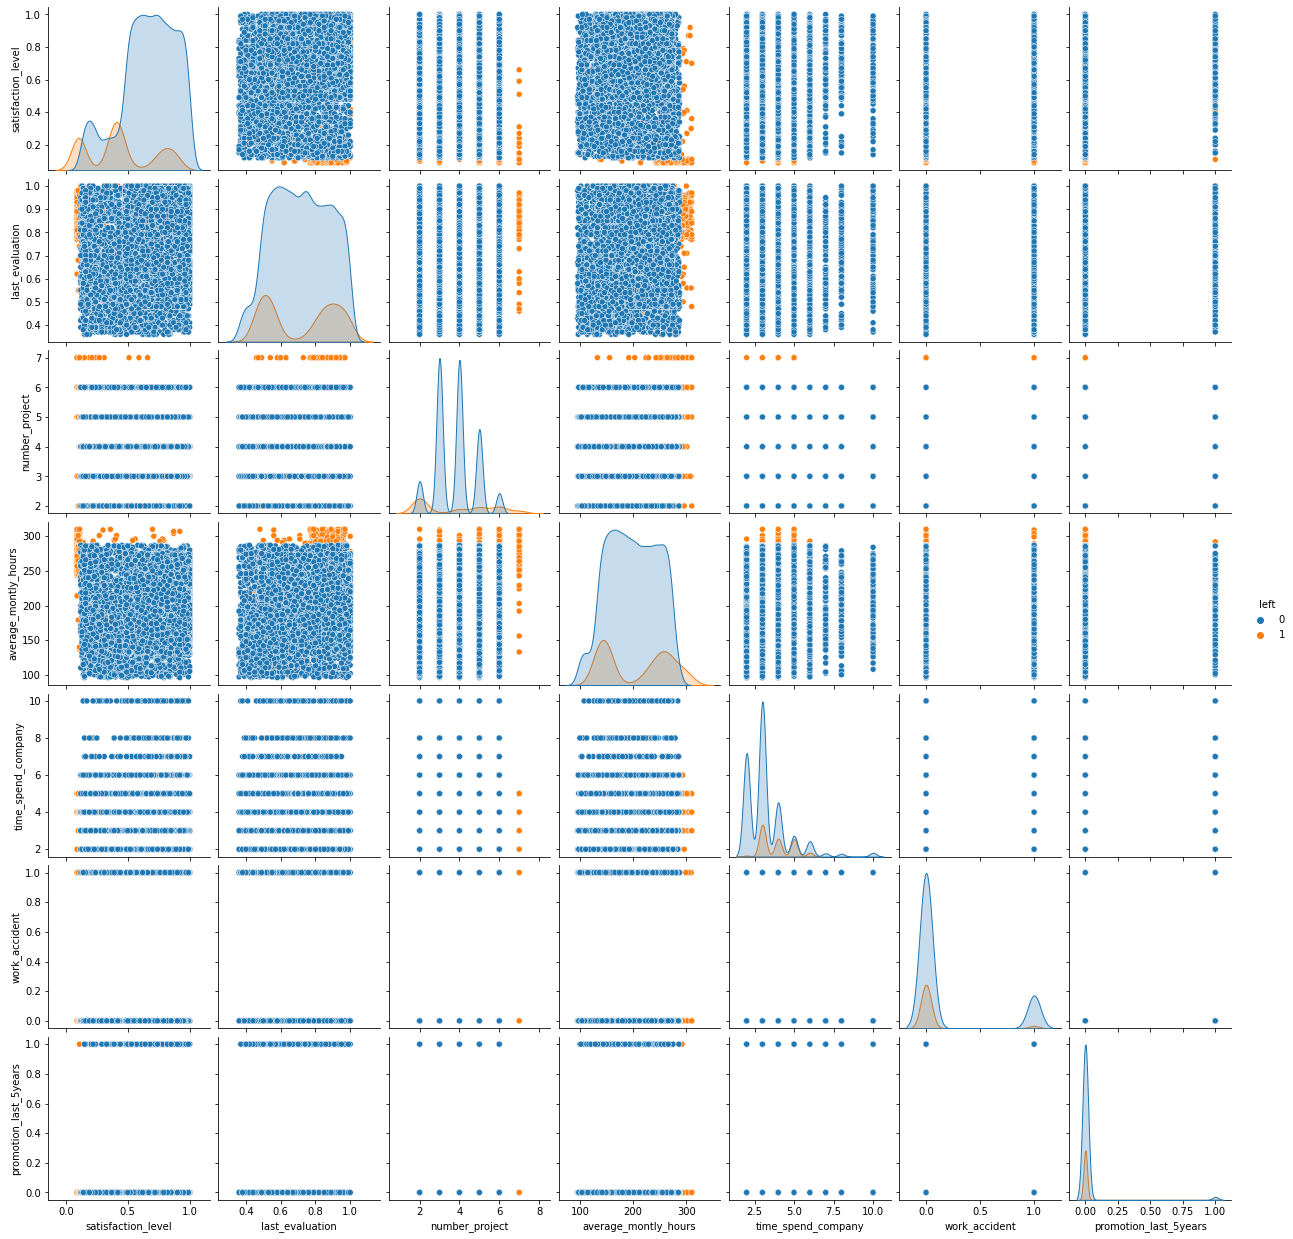

In [69]:
sns.pairplot(data=df, hue='left')
# cok fazla proje alanlarin/fazla calisanlarin isten ayrildigi görülüyor

PCA

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [71]:
scaler = StandardScaler()


In [72]:
df_num = df.select_dtypes(exclude='object')
df_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0
11996,0.74,0.95,5,266,10,0,1,0
11997,0.85,0.54,3,185,10,0,1,0
11998,0.33,0.65,3,172,10,0,1,0


In [73]:
df_num.drop(['work_accident', 'left', 'promotion_last_5years'], axis=1, inplace=True)


In [74]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    11991 non-null  float64
 1   last_evaluation       11991 non-null  float64
 2   number_project        11991 non-null  int64  
 3   average_montly_hours  11991 non-null  int64  
 4   time_spend_company    11991 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 820.1 KB


In [75]:
df_num_sca = scaler.fit_transform(df_num)


Text(0, 0.5, 'Variance Ratio')

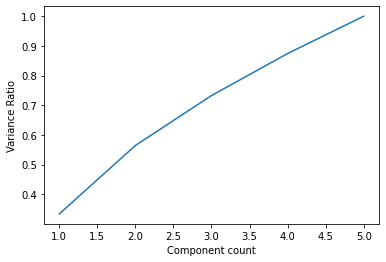

In [76]:
pca = PCA().fit(df_num_sca)
x = range(1, 6) # sonuncusu exclusive
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")


In [77]:
pca = PCA(n_components=3).fit_transform(df_num_sca)


In [78]:
df_pca = pd.DataFrame(pca)
df_pca = df_pca.rename(columns={0: "first_component", 1: "second_component", 2: "third_component"})
df_pca['left'] = df['left']
df_pca.head()


,first_component,second_component,third_component,left
0,-1.876451,1.180296,-0.226553,1.0
1,2.284329,-0.157855,1.385014,1.0
2,3.315255,1.370905,-1.487862,1.0
3,1.666321,-0.110614,0.913840,1.0
4,-1.877495,1.227629,-0.268817,1.0


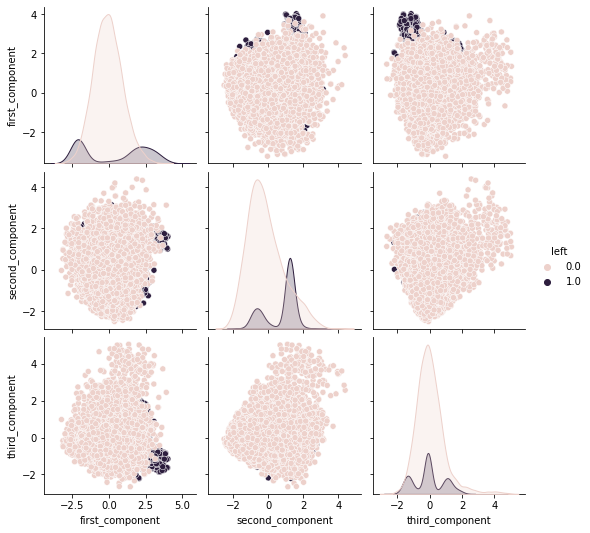

In [79]:
sns.pairplot(data=df_pca, hue='left')

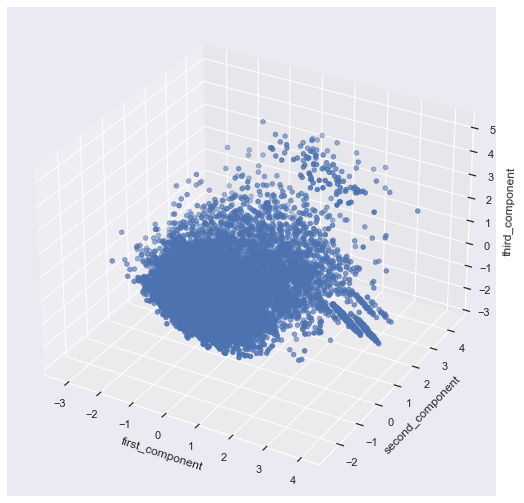

In [80]:
from turtle import color
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv('2016.csv')
sns.set(style="darkgrid")

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111, projection='3d')

x = df_pca['first_component']
y = df_pca['second_component']
z = df_pca['third_component']

ax.set_xlabel("first_component")
ax.set_ylabel("second_component")
ax.set_zlabel("third_component")

ax.scatter(x, y, z)

plt.show()


In [81]:
import plotly.express as px

fig = px.scatter_3d(df_pca, x='first_component', y='second_component', z='third_component',
                    color='left')
fig.show()


#### Encoding

Pek çok makine öğrenimi algoritması sayısal girdi verileri gerektirir, bu nedenle kategorik sütunları sayısal bir sütunda temsil etmeniz gerekir. Bu verileri kodlamak için her değeri bir sayıya eşleyebilirsiniz. Örneğin, Maaş sütununun değeri düşük:0, orta:1 ve yüksek:2 olarak gösterilebilir. Bu işlem etiket kodlaması olarak bilinir ve sklearn bunu sizin için LabelEncoder kullanarak yapacaktır.

In [2]:
df['salary'] = df['salary'].map({'medium': 1, 'high': 2, 'low': 0})

NameError: name 'df' is not defined

In [83]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left,salary_
6752,0.83,0.86,3,273,3,0,0,technical,medium,0,1
11421,0.81,0.74,2,228,3,0,0,management,high,0,2
8632,0.96,0.53,3,166,3,0,0,marketing,low,0,0
1337,0.41,0.56,2,143,3,0,0,technical,low,1,0
10345,0.91,0.82,6,280,3,0,0,technical,low,0,0


In [84]:
df.drop('salary', axis=1, inplace=True)

In [ ]:
df.department.unique()

In [86]:
df1= df.copy()

In [87]:
df1 = df1.drop('left', axis=1)

In [88]:
df.salary_.info()

<class 'pandas.core.series.Series'>
Int64Index: 11991 entries, 0 to 11999
Series name: salary_
Non-Null Count  Dtype
--------------  -----
11991 non-null  int64
dtypes: int64(1)
memory usage: 445.4 KB


In [89]:
df1 = pd.get_dummies(df1, columns=['department'], drop_first=True)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
scaler.fit(df1)
df1_scaled= scaler.transform(df1)

In [91]:
df1_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

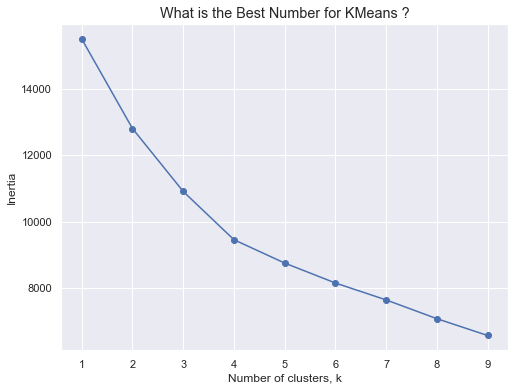

In [92]:
ks = range(1, 10)
inertias = []
for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(df1_scaled)
    inertias.append(kc.inertia_)

f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')  # kirilma 4 gibi gözüküyor
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()


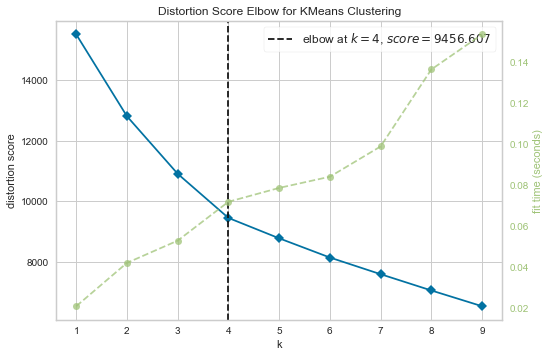

In [93]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1, 10))
visu.fit(df1_scaled)
visu.show();  # burada da 4

In [94]:
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [95]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')
# en yüksek skoru 9. cluster'da yakalamis ama o da cok düsük

Silhouette Score for 2 clusters: 0.1797702102762993
Silhouette Score for 3 clusters: 0.246060177218405
Silhouette Score for 4 clusters: 0.2952110865023317
Silhouette Score for 5 clusters: 0.288850624198923
Silhouette Score for 6 clusters: 0.33572448549886097
Silhouette Score for 7 clusters: 0.3320501432706262
Silhouette Score for 8 clusters: 0.3391398402888926
Silhouette Score for 9 clusters: 0.34581670698533434


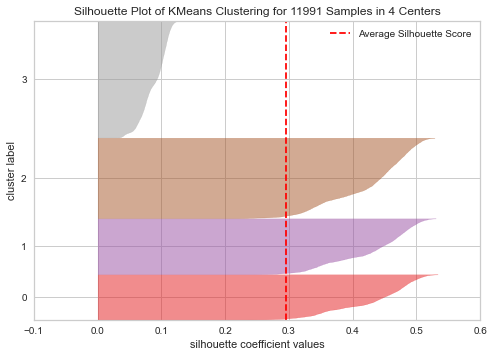

In [96]:
model = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df1_scaled)    # Fit the data to the visualizer
visualizer.poof();
# 3 cluster'i yaklasik %30luk degerde ayristirmis

In [97]:
k_means_model = KMeans(n_clusters=4, random_state=101)
k_means_model.fit_predict(df1_scaled)

array([2, 2, 2, ..., 3, 3, 3])

In [98]:
df['pred_clusters'] = k_means_model.labels_
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,left,salary_,pred_clusters
0,0.38,0.53,2,157,3,0,0,sales,1,0,2
1,0.80,0.86,5,262,6,0,0,sales,1,1,2
2,0.11,0.88,7,272,4,0,0,sales,1,1,2
3,0.72,0.87,5,223,5,0,0,sales,1,0,2
4,0.37,0.52,2,159,3,0,0,sales,1,0,2


In [99]:
df.pred_clusters.value_counts()  # elimizdeki datayi cluster'lara atadi

3    4687
2    3239
1    2244
0    1821
Name: pred_clusters, dtype: int64

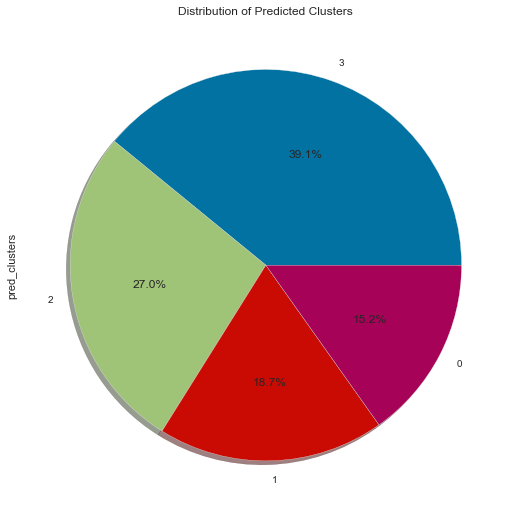

In [100]:
plt.figure(figsize=(20, 9))
df.pred_clusters.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters')
plt.show()
# genel dagilim

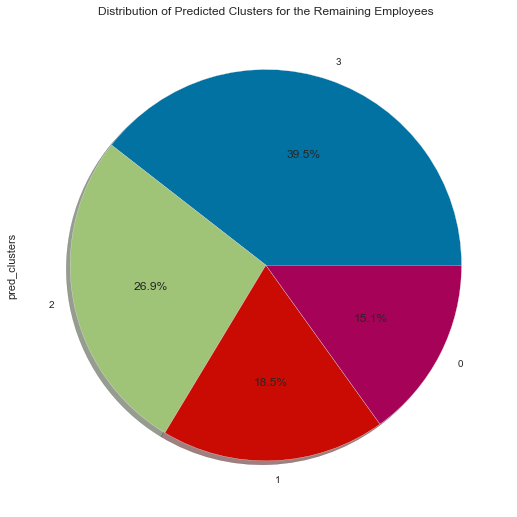

In [101]:
plt.figure(figsize=(20, 9))
df[df['left'] == 0]['pred_clusters'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters for the Remaining Employees')
plt.show()
# 0'lar icin dagilim

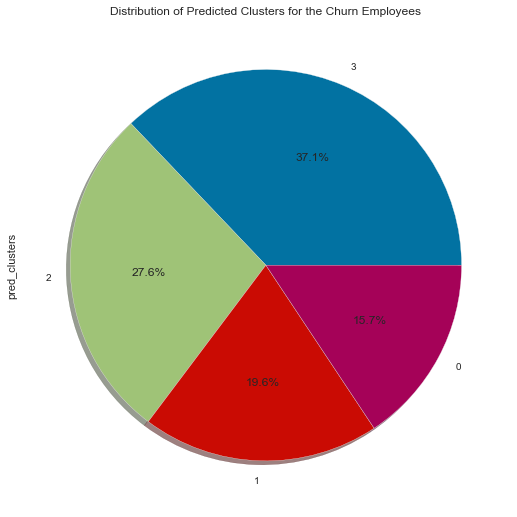

In [102]:
plt.figure(figsize=(20, 9))
df[df['left'] == 1]['pred_clusters'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters for the Churn Employees')
plt.show()
# 1'ler icin dagilim

<AxesSubplot:xlabel='left'>

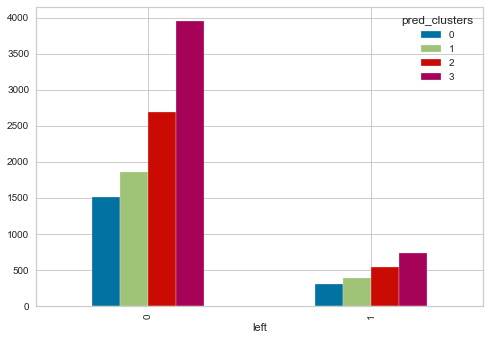

In [103]:
pd.crosstab(df['left'],
            df['pred_clusters']).plot(kind="bar")

#### ayrilan ve calisanlarin özellikleri bir birine cok benzer bu yüzden iyi bir dagilim yapamadi. silhouette skor da %50'nin altindaydi

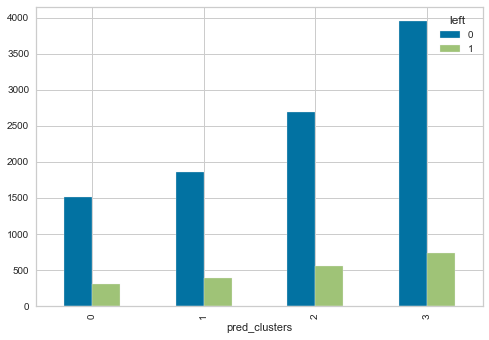

In [104]:
pd.crosstab(df['pred_clusters'],
            df['left']).plot(kind="bar");


## 5. Model Building

### Split Data as Train and Test Set

In [106]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,left,salary_,pred_clusters
0,0.38,0.53,2,157,3,0,0,sales,1,0,2


In [107]:
df2 = df.drop('pred_clusters', axis=1)
df2.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,left,salary_
0,0.38,0.53,2,157,3,0,0,sales,1,0


In [108]:
X = df2.drop('left', axis=1)
y = df2['left']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=101)

In [111]:
cat = X_train.select_dtypes("object").columns
cat

Index(['department'], dtype='object')

## Logistic Model

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [114]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())

In [115]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [116]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[1555  446]
 [  71  327]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2001
           1       0.42      0.82      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.80      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6066 1933]
 [ 275 1318]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.87      0.77      0.80      9592



In [117]:
scoring = {"precision_churn": make_scorer(precision_score, labels=1),
           "recall_churn": make_scorer(recall_score, labels=1),
           "f1_churn": make_scorer(f1_score, labels=1)}


Cross Validation For Logistic Model

In [118]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]
#underfitting

test_precision_churn     0.404339
train_precision_churn    0.404676
test_recall_churn        0.824285
train_recall_churn       0.826394
test_f1_churn            0.542465
train_f1_churn           0.543301
dtype: float64

### Logistic Model GridsearchCV

In [119]:
recall_churn = make_scorer(recall_score, average=None, labels=1)


In [120]:
param_grid = {
    "log__C": [0.01, 0.1, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['saga', 'sag' 'liblinear', 'lbfgs'],
}


In [121]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_churn,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)


In [122]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['department'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.01, 0.1, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['saga', 'sagliblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=3)

In [123]:
log_model_grid.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [124]:
log_model_grid.best_params_


{'log__C': 0.01, 'log__penalty': 'l1', 'log__solver': 'saga'}

In [125]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[1558  443]
 [  81  317]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2001
           1       0.42      0.80      0.55       398

    accuracy                           0.78      2399
   macro avg       0.68      0.79      0.70      2399
weighted avg       0.86      0.78      0.80      2399


Train_Set
[[6075 1924]
 [ 303 1290]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7999
           1       0.40      0.81      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.78      0.69      9592
weighted avg       0.86      0.77      0.79      9592



Model fitting with best parameters

In [126]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log_model_grid", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                                     random_state=101, C= 0.01, penalty= 'l1', solver= 'saga'))]

pipe_log_model_tuned = Pipeline(steps=operations)



In [127]:
pipe_log_model_tuned.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('log_model_grid',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [128]:
eval_metric(pipe_log_model_tuned, X_train, y_train, X_test, y_test)


Test_Set
[[1558  443]
 [  81  317]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2001
           1       0.42      0.80      0.55       398

    accuracy                           0.78      2399
   macro avg       0.68      0.79      0.70      2399
weighted avg       0.86      0.78      0.80      2399


Train_Set
[[6075 1924]
 [ 303 1290]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7999
           1       0.40      0.81      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.78      0.69      9592
weighted avg       0.86      0.77      0.79      9592



Prediction Logistic Regression

In [129]:
y_pred = pipe_log_model_tuned.predict(X_test)
y_train_pred = pipe_log_model_tuned.predict(X_train)

LOG_tuned_f1 = f1_score(y_test, y_pred)
LOG_tuned_acc = accuracy_score(y_test, y_pred)
LOG_tuned_recall = recall_score(y_test, y_pred)
LOG_tuned_auc = roc_auc_score(y_test, y_pred)

In [130]:
Log_Pred = {"Actual": y_test, "Log_Pred": y_pred}
Log_Pred = pd.DataFrame.from_dict(Log_Pred)
Log_Pred.head()


,Actual,Log_Pred
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


In [131]:
Model_Preds = Log_Pred
Model_Preds.head()


,Actual,Log_Pred
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


## Gradient Boosting Classifier

#### Model Building

In [132]:
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [134]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("grad", GradientBoostingClassifier(random_state=101))]

pipe_grad_model = Pipeline(steps=operations)
# OneHotEncoder yerine ordinalencoder

In [135]:
pipe_grad_model.fit(X_train, y_train)
eval_metric(pipe_grad_model, X_train, y_train, X_test, y_test)


Test_Set
[[1985   16]
 [  24  374]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.94      0.95       398

    accuracy                           0.98      2399
   macro avg       0.97      0.97      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7946   53]
 [ 122 1471]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.97      0.92      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



GradientBoosting Cross Validation

In [137]:
operations = [("OneHotEncoder", column_trans), ("grad", GradientBoostingClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_churn     0.959333
train_precision_churn    0.966858
test_recall_churn        0.916545
train_recall_churn       0.923624
test_f1_churn            0.937352
train_f1_churn           0.944745
dtype: float64

GradientBoosting GridsearchCV

In [146]:
operations = [("OneHotEncoder", column_trans),
              ("GB", GradientBoostingClassifier(random_state=101))]


pipe_gb_gs = Pipeline(steps=operations)
pipe_gb_gs


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('GB', GradientBoostingClassifier(random_state=101))])

In [ ]:
pipe_gb_gs.get_params()


In [149]:
param_grid = {"GB__n_estimators":[100, 300], "GB__subsample":[0.5, 1], "GB__max_features" : [None, 2, 4], 
              "GB__learning_rate": [0.01, 0.1], 'GB__max_depth':[3,6]} 

In [150]:
grad_model_grid = GridSearchCV(pipe_gb_gs,
                              param_grid,
                              verbose=3,
                              scoring=recall_churn,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)


In [151]:
grad_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['department'], dtype='object'))])),
                                       ('GB',
                                        GradientBoostingClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB__learning_rate': [0.01, 0.1],
                         'GB__max_depth': [3, 6],
                         'GB__max_features': [None, 2, 4],
                         'GB__n_estimators': [100, 300],
                         'GB__subsample': [0.5, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=3)

In [152]:
grad_model_grid.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('GB',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=101, subsample=0.5))])

In [153]:
grad_model_grid.best_params_


{'GB__learning_rate': 0.01,
 'GB__max_depth': 3,
 'GB__max_features': None,
 'GB__n_estimators': 100,
 'GB__subsample': 0.5}

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [154]:
print("GB_Grid_Model")
print("------------------")
eval_metric(grad_model_grid, X_train, y_train, X_test, y_test)


GB_Grid_Model
------------------
Test_Set
[[1990   11]
 [ 126  272]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2001
           1       0.96      0.68      0.80       398

    accuracy                           0.94      2399
   macro avg       0.95      0.84      0.88      2399
weighted avg       0.94      0.94      0.94      2399


Train_Set
[[7954   45]
 [ 533 1060]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7999
           1       0.96      0.67      0.79      1593

    accuracy                           0.94      9592
   macro avg       0.95      0.83      0.88      9592
weighted avg       0.94      0.94      0.94      9592



Model fitting with best parameters


In [157]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("gradlast", GradientBoostingClassifier(learning_rate= 0.01,
                                                                                       max_depth= 3,
                                                                                       max_features= None,
                                                                                       n_estimators= 100,
                                                                                       subsample= 0.5))]

grad_last = Pipeline(steps=operations)
grad_last

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('gradlast',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            subsample=0.5))])

In [158]:
grad_last.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('gradlast',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            subsample=0.5))])

In [159]:
eval_metric(grad_last, X_train, y_train, X_test, y_test)


Test_Set
[[1989   12]
 [ 126  272]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2001
           1       0.96      0.68      0.80       398

    accuracy                           0.94      2399
   macro avg       0.95      0.84      0.88      2399
weighted avg       0.94      0.94      0.94      2399


Train_Set
[[7950   49]
 [ 533 1060]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7999
           1       0.96      0.67      0.78      1593

    accuracy                           0.94      9592
   macro avg       0.95      0.83      0.87      9592
weighted avg       0.94      0.94      0.93      9592



- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

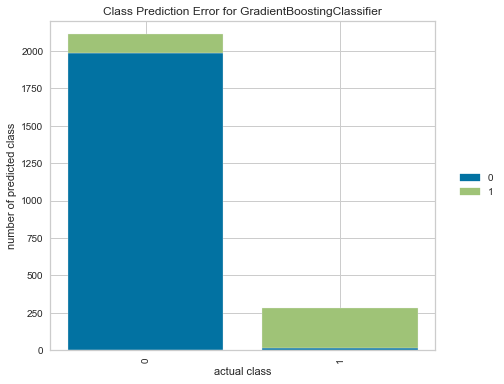

In [160]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(grad_last)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

Gradient Boosting Classifier ROC (Receiver Operating Curve) and AUC (Area Under Curve)

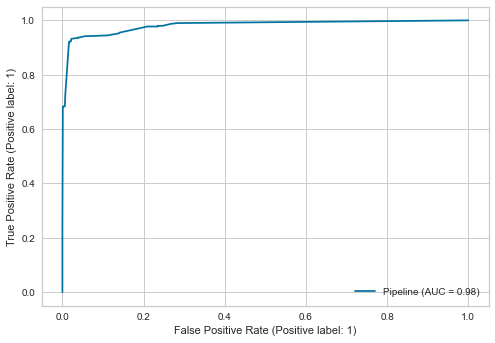

In [162]:
plot_roc_curve(grad_last, X_test, y_test)

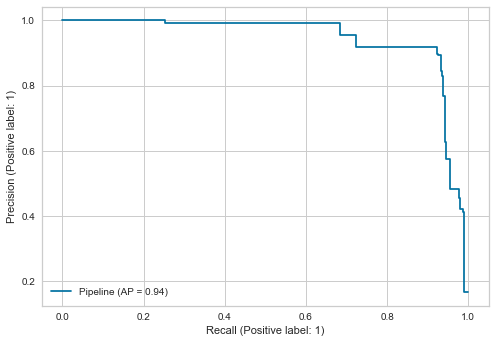

In [163]:
plot_precision_recall_curve(grad_last, X_test, y_test)


#### Prediction GradientBoosting

In [164]:
y_pred = grad_last.predict(X_test)
y_train_pred = grad_last.predict(X_train)


In [165]:
Grad_tuned_f1 = f1_score(y_test, y_pred)
Grad_tuned_acc = accuracy_score(y_test, y_pred)
Grad_tuned_recall = recall_score(y_test, y_pred)
Grad_tuned_auc = roc_auc_score(y_test, y_pred)


In [166]:
Grad_Pred = {"Actual": y_test, "Grad_Pred": y_pred}
Grad_Pred = pd.DataFrame.from_dict(Grad_Pred)
Grad_Pred.head()


,Actual,Grad_Pred
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


In [167]:
Model_Preds.sample()

,Actual,Log_Pred
2327,0,1


In [168]:
Grad_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, Grad_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()


,Actual,Log_Pred,Grad_Pred
492,1,1,1
7100,0,0,0
4714,0,0,0
7188,0,0,0
3882,0,0,0


## Distance Based Algorithm

## K-Neighbors Classifier Model 

In [313]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,left,salary_
0,0.38,0.53,2,157,3,0,0,sales,1,0
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0


In [314]:
X = df2.drop('left', axis=1)
y = df2['left']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)


In [316]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


In [317]:
operations = [('OneHotEncoder', column_trans), ("knn", KNeighborsClassifier(
    n_neighbors=5))]  
pipe_model_knn = Pipeline(steps=operations)

pipe_model_knn.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [318]:
print("Pipe_Model_KNN")
print("------------------")
eval_metric(pipe_model_knn, X_train, y_train, X_test, y_test)


Pipe_Model_KNN
------------------
Test_Set
[[1923   78]
 [  37  361]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.82      0.91      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7821  178]
 [ 162 1431]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.89      0.90      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.94      0.94      9592
weighted avg       0.96      0.96      0.96      9592



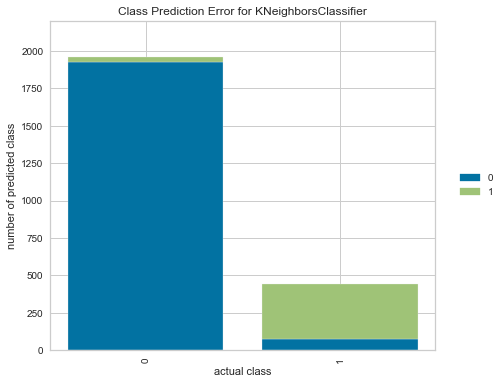

In [319]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model_knn)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();


In [144]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate


In [320]:
test_error_rates = []


for k in range(1, 30):

    model = Pipeline(
        [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(
            n_neighbors=k))])

    scores = cross_validate(model, X_train, y_train, scoring=[
                            'accuracy'], cv=10, error_score="raise")

    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)


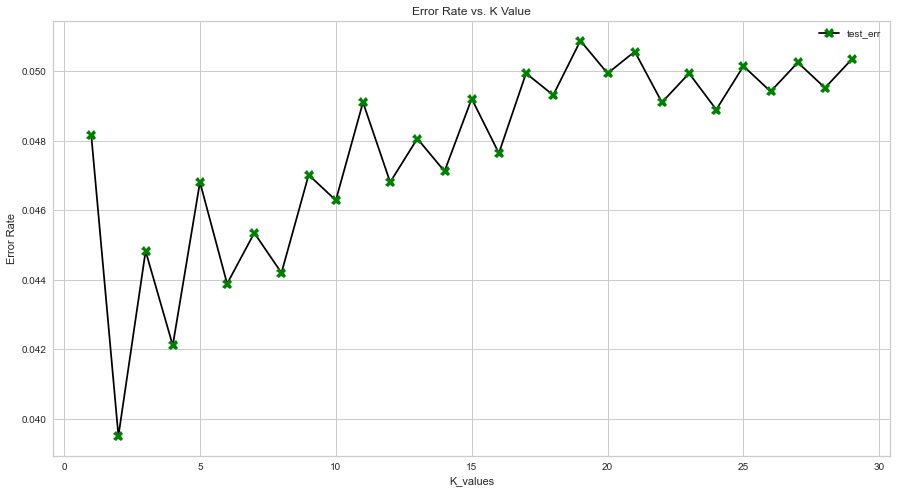

In [189]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(["test_err", "cv_test_err"])


In [190]:
test_error_rates = []
train_error_rates = []


for k in range(1, 30):

    operations = [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(
        n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=[
                            'accuracy'], cv=10, return_train_score=True)

    accuracy_test_mean = scores["test_accuracy"].mean()
    accuracy_train_mean = scores["train_accuracy"].mean()

    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)


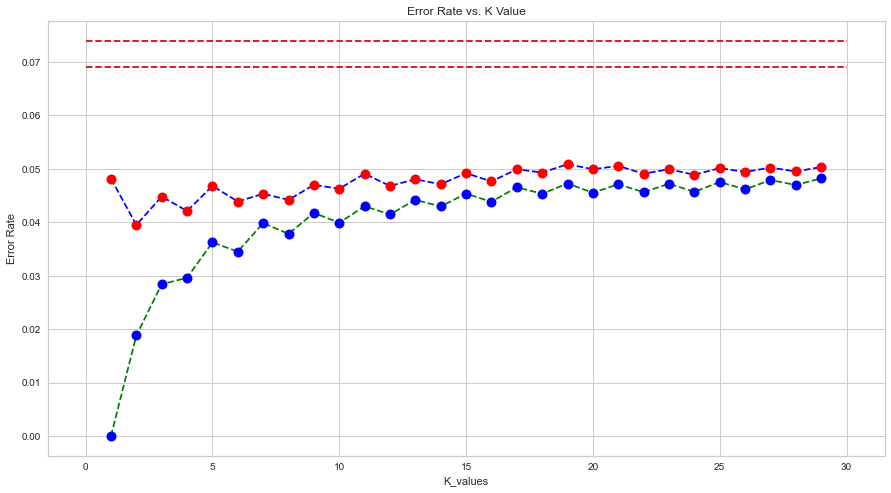

In [191]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1, 30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='r', linestyles="--")

In [321]:
# FIRST A QUICK COMPARISON TO OUR DEFAULT K=5
operations_knn = [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(
    n_neighbors=5))]

knn5 = Pipeline(steps=operations_knn)
knn5.fit(X_train, y_train)
pred = knn5.predict(X_test)

print('WITH K=5')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))


WITH K=5
---------------
[[1923   78]
 [  37  361]]
---------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.82      0.91      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399



In [322]:
# NOW K=4

operations_knn = [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(
    n_neighbors=4))]

knn4 = Pipeline(steps=operations_knn)
knn4.fit(X_train, y_train)
pred = knn4.predict(X_test)

print('WITH K=4')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))


WITH K=4
---------------
[[1947   54]
 [  45  353]]
---------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.89      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399



In [323]:
# NOW K=6

operations_knn = [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(
    n_neighbors=6))]

knn6 = Pipeline(steps=operations_knn)
knn6.fit(X_train, y_train)
pred = knn6.predict(X_test)

print('WITH K=6')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))


WITH K=6
---------------
[[1933   68]
 [  40  358]]
---------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.90      0.87       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.95      0.96      2399



As seen above we are getting the best results with K=4

Cross Validation for K=4

In [201]:
operations = [("OneHotEncoder", column_trans), ("knn", KNeighborsClassifier(n_neighbors=4))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall',
                                                          'f1'], cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.017251,0.048517,0.961458,0.970459,0.912752,0.933726,0.850000,0.884857,0.880259,0.908635
2,0.009001,0.047007,0.958333,0.970459,0.905405,0.929927,0.837500,0.889044,0.870130,0.909026
3,0.012003,0.046010,0.962461,0.969999,0.912752,0.929773,0.855346,0.886332,0.883117,0.907533
4,0.020624,0.124440,0.954119,0.971273,0.836257,0.939259,0.899371,0.884240,0.866667,0.910920
5,0.011894,0.048126,0.957247,0.970462,0.847059,0.934414,0.905660,0.884240,0.875380,0.908635
6,0.020004,0.058012,0.954119,0.971273,0.870968,0.937962,0.849057,0.885635,0.859873,0.911047
7,0.015522,0.050520,0.955162,0.968956,0.845238,0.928047,0.893082,0.881450,0.868502,0.904149
8,0.012005,0.047010,0.972888,0.969304,0.946309,0.928833,0.886792,0.882845,0.915584,0.905256
9,0.010830,0.045876,0.950991,0.970694,0.850000,0.932601,0.855346,0.887727,0.852665,0.909611
10,0.009327,0.042994,0.952033,0.970926,0.865385,0.934559,0.843750,0.886950,0.854430,0.910132


In [202]:
df_scores.mean()[2:]


test_accuracy      0.957881
train_accuracy     0.970380
test_precision     0.879212
train_precision    0.932910
test_recall        0.867590
train_recall       0.885332
test_f1            0.872661
train_f1           0.908494
dtype: float64

## Evaluating ROC Curves and AUC

In [203]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve


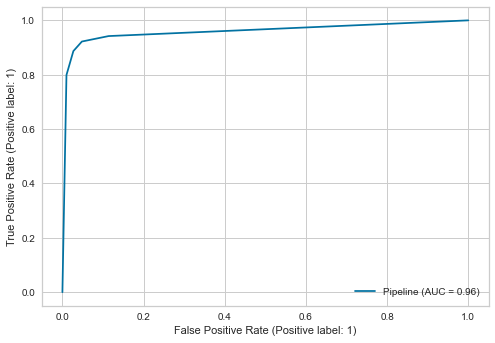

In [204]:
plot_roc_curve(knn4, X_test, y_test);


Prediction KNN

In [324]:
y_pred_proba = knn4.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.959248390879937

In [325]:
KNN_f1 = f1_score(y_test, y_pred)
KNN_acc = accuracy_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_auc = roc_auc_score(y_test, y_pred)


In [206]:
KNN_Pred = {"Actual": y_test, "KNN_Pred": y_pred}
KNN_Pred = pd.DataFrame.from_dict(KNN_Pred)
KNN_Pred.head()


,Actual,KNN_Pred
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


In [207]:
KNN_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, KNN_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()


,Actual,Log_Pred,Grad_Pred,KNN_Pred
492,1,1,1,1
7100,0,0,0,0
4714,0,0,0,0
7188,0,0,0,0
3882,0,0,0,0


### #Random Forest Classifier

#### Model Building

In [326]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,left,salary_
0,0.38,0.53,2,157,3,0,0,sales,1,0
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0


In [327]:
X = df2.drop('left', axis=1)
y = df2['left']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=101)

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [329]:
operations_rf = [("OneHotEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [330]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


#### Evaluating Model Performance and Tuning

In [331]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)


Test_Set
[[1998    3]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



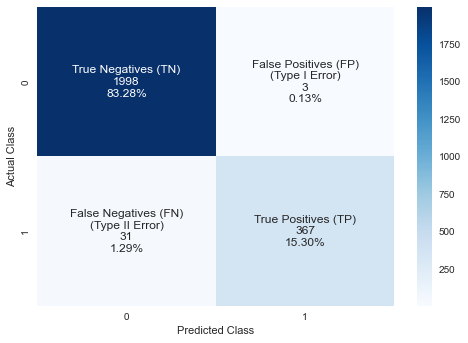

In [332]:
y_pred = pipe_model_rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)",
               "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel="Actual Class")
plt.show()

Cross Validation RF

In [333]:
model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring=scoring,
                        cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
round((df_scores.mean()[2:]), 3)


test_precision_churn     0.988
train_precision_churn    1.000
test_recall_churn        0.901
train_recall_churn       0.999
test_f1_churn            0.942
train_f1_churn           1.000
dtype: float64

Random Forest Classifier GridSearchCV

In [334]:
operations_rf = [("OneHotEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_rf_grid = Pipeline(steps=operations_rf)
pipe_rf_grid

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
pipe_rf_grid.get_params()

In [222]:
param_grid = {'RF_model__n_estimators': [100, 300, 500],
              'RF_model__max_features': ['auto', None, 15, 20],
              'RF_model__max_depth': [3, 5, 7],
              'RF_model__min_samples_split': [18, 20, 22]}


In [223]:
RF_grid_model = GridSearchCV(estimator=pipe_rf_grid,
                             param_grid=param_grid,
                             scoring=recall_churn,
                             n_jobs=-1, verbose=2)
RF_grid_model.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['department'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [3, 5, 7],
                         'RF_model__max_features': ['auto', None, 15, 20],
                         'RF_model__min_samples_split': [18, 20, 22],
                         'RF_model__n_estimators': [100, 300, 500]},
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=2)

In [224]:
RF_grid_model.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='auto',
                                        min_samples_split=18,
                                        random_state=101))])

In [225]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint


In [226]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m',
      'blue'), colored(RF_grid_model.best_params_, 'red'))


Best Parameters of GridSearchCV for Random Forest Model: {'RF_model__max_depth': 3, 'RF_model__max_features': 'auto', 'RF_model__min_samples_split': 18, 'RF_model__n_estimators': 100}


In [227]:
operations_tuned_rf = [("OneHotEncoder", column_trans),
                       ("RF_tuned", RandomForestClassifier(max_depth= 3, max_features= 'auto', min_samples_split= 18, n_estimators= 100))]

rf_tuned = Pipeline(steps=operations_tuned_rf)
rf_tuned


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('RF_tuned',
                 RandomForestClassifier(max_depth=3, max_features='auto',
                                        min_samples_split=18))])

In [228]:
rf_tuned.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('RF_tuned',
                 RandomForestClassifier(max_depth=3, max_features='auto',
                                        min_samples_split=18))])

In [229]:
y_pred = rf_tuned.predict(X_test)
y_train_pred = rf_tuned.predict(X_train)

RF_tuned_f1 = f1_score(y_test, y_pred)
RF_tuned_acc = accuracy_score(y_test, y_pred)
RF_tuned_recall = recall_score(y_test, y_pred)
RF_tuned_auc = roc_auc_score(y_test, y_pred)


In [231]:
print("RF_tuned")
print("------------------")
eval_metric(rf_tuned, X_train, y_train, X_test, y_test)

RF_tuned
------------------
Test_Set
[[1987   14]
 [ 174  224]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2001
           1       0.94      0.56      0.70       398

    accuracy                           0.92      2399
   macro avg       0.93      0.78      0.83      2399
weighted avg       0.92      0.92      0.91      2399


Train_Set
[[7960   39]
 [ 692  901]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7999
           1       0.96      0.57      0.71      1593

    accuracy                           0.92      9592
   macro avg       0.94      0.78      0.83      9592
weighted avg       0.93      0.92      0.92      9592



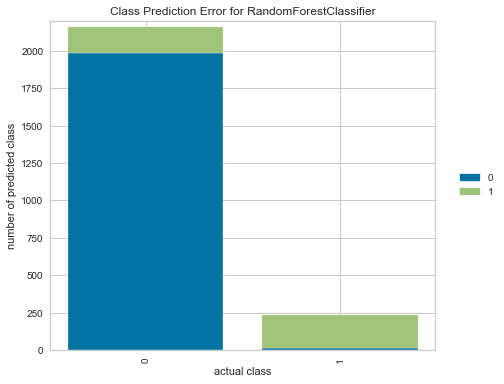

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [233]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rf_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof()


Better Random Forest results without GridsearchCV

## Evaluating ROC Curves and AUC

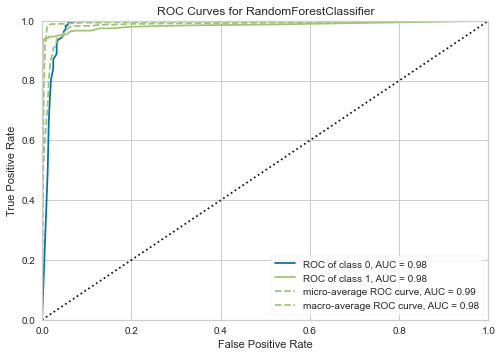

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [335]:
from yellowbrick.classifier import ROCAUC

model = pipe_model_rf
visualizer = ROCAUC(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()


In [336]:
y_pred = pipe_model_rf.predict(X_test)
y_pred_proba = pipe_model_rf.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9846452401939734

In [337]:
pipe_rf_f1 = f1_score(y_test, y_pred)
pipe_rf_acc = accuracy_score(y_test, y_pred)
pipe_rf_recall = recall_score(y_test, y_pred)
pipe_rf_auc = roc_auc_score(y_test, y_pred)


#### Prediction

In [238]:
print('RF Predictions:')
RF_Pred = {"Actual": y_test, "RF Predictions": y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.head()


RF Predictions:


,Actual,RF Predictions
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


In [239]:
RF_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, RF_Pred, 
                       left_index=True, right_index=True)
Model_Preds.head()


,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions
492,1,1,1,1,1
7100,0,0,0,0,0
4714,0,0,0,0,0
7188,0,0,0,0,0
3882,0,0,0,0,0


### #XGBoost Classifier

#### Model Building

In [240]:
from xgboost import XGBClassifier

In [241]:
operations_xgb = [("OneHotEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

In [242]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train)
classes_weights

array([0.59957495, 3.01067169, 0.59957495, ..., 0.59957495, 0.59957495,
       0.59957495])

In [243]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index=y_train.index)

comp["label"] = y_train
comp.head()


,weights,label
3350,0.599575,0
175,3.010672,1
3825,0.599575,0
4178,0.599575,0
11878,0.599575,0


In [244]:
comp.groupby("label")["weights"].value_counts()


label  weights 
0      0.599575    7999
1      3.010672    1593
Name: weights, dtype: int64

In [245]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

In [246]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)


Test_Set
[[1939   62]
 [  19  379]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.86      0.95      0.90       398

    accuracy                           0.97      2399
   macro avg       0.92      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7835  164]
 [ 103 1490]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.90      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



Cross Validation

In [247]:
model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights})
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_precision_churn     0.888385
train_precision_churn    0.901939
test_recall_churn        0.929694
train_recall_churn       0.936598
test_f1_churn            0.908435
train_f1_churn           0.918934
dtype: float64

## Gridsearch

In [338]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [339]:
model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring=recall_churn,
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)


In [340]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoding',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['department'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(colsample_bytree=0.8,
                                                      learning_rate=0.03,
                                                      max_depth=1,
                                                      n_estimators=20,
                                                      orandom_state=101,
                                                      subsample=0.8))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1))

In [251]:
xgb_grid_model.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.03,
                               max_depth=1, n_estimators=20, random_state=101,
                               subsample=0.8))])

In [252]:
xgb_grid_model.best_params_


{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.03,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

Model Fitting with Best Parameters

In [341]:
operations_xgb = [("OneHotEncoding", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.03,
                                                                                max_depth=1, n_estimators=20, orandom_state=101,
                                                                                subsample=0.8))]

XGB_last = Pipeline(steps=operations_xgb)

XGB_last.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)


Pipeline(steps=[('OneHotEncoding',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.03,
                               max_depth=1, n_estimators=20, orandom_state=101,
                               subsample=0.8))])

In [342]:
y_pred = XGB_last.predict(X_test)
y_pred_proba = XGB_last.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(XGB_last, X_train, y_train, X_test, y_test)


Test_Set
[[1729  272]
 [ 115  283]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2001
           1       0.51      0.71      0.59       398

    accuracy                           0.84      2399
   macro avg       0.72      0.79      0.75      2399
weighted avg       0.87      0.84      0.85      2399


Train_Set
[[6822 1177]
 [ 472 1121]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7999
           1       0.49      0.70      0.58      1593

    accuracy                           0.83      9592
   macro avg       0.71      0.78      0.73      9592
weighted avg       0.86      0.83      0.84      9592



## Evaluating ROC Curves and AUC

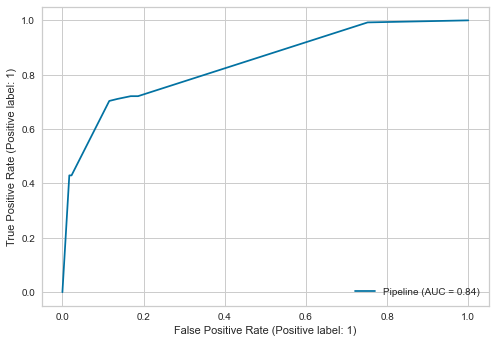

In [258]:
plot_roc_curve(XGB_last, X_test, y_test)


#### Prediction

In [259]:
print('XGB Predictions:')
XGB_Pred = {"Actual": y_test, "XGB Predictions": y_pred}
XGB_Pred = pd.DataFrame.from_dict(XGB_Pred)
XGB_Pred.head()


XGB Predictions:


,Actual,XGB Predictions
492,1,1
7100,0,0
4714,0,0
7188,0,0
3882,0,0


In [260]:
XGB_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, XGB_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()


,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions,XGB Predictions
492,1,1,1,1,1,1
7100,0,0,0,0,0,0
4714,0,0,0,0,0,0
7188,0,0,0,0,0,0
3882,0,0,0,0,0,0


In [261]:
Model_Preds.sample(5)


,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions,XGB Predictions
6958,0,0,0,0,0,0
1786,1,1,1,1,1,1
11772,0,0,0,0,0,0
6561,0,0,0,0,0,0
10244,0,0,0,0,0,0


### #ANN Classifier

#### Layer Architecture Building and Compiling

In [271]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


In [288]:
X_train.drop('department', axis=1, inplace=True)
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_
3350,0.88,0.80,3,133,3,0,0,1
175,0.54,0.74,4,164,2,0,0,0
3825,0.90,0.51,4,214,2,0,0,0
4178,0.95,0.67,4,270,4,0,0,1
11878,0.68,0.66,3,238,2,0,0,1
...,...,...,...,...,...,...,...,...
5734,0.53,0.54,4,257,3,1,0,0
5470,0.58,0.84,4,271,2,0,0,1
6153,0.65,0.60,3,142,2,0,0,2
9891,0.74,0.44,5,169,3,1,0,1


In [289]:
X_test.drop('department', axis=1, inplace=True)
X_test


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_
492,0.11,0.83,6,244,4,0,0,1
7100,0.66,0.65,3,234,2,0,0,1
4714,0.79,0.89,3,104,4,0,0,0
7188,0.92,0.78,4,212,2,0,0,1
3882,0.90,0.85,5,162,2,0,0,1
...,...,...,...,...,...,...,...,...
7187,0.96,0.62,6,193,4,0,0,1
5741,0.59,0.39,4,190,5,0,0,1
5289,0.80,0.85,3,135,2,0,0,1
1106,0.44,0.57,2,139,3,0,0,0


In [290]:
X_train.shape


(9592, 8)

In [291]:
X_test.shape


(2399, 8)

In [276]:
seed = 101

In [292]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation="relu", input_dim=X_train.shape[1]))
# 0,5 ne kadar oranla süzgec gecirecek nöronlari, bu katmanin random olarak %50 sini gecir %50 sini bloke et
model.add(Dropout(0.5))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [293]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=10, restore_best_weights=True)


In [295]:
model.fit(x=X_train, y=y_train, validation_split = 0.1, batch_size=32, epochs=1000, verbose=1,
          callbacks=[early_stop])


Epoch 1/1000
270/270 [==============================] - 1s 3ms/step - loss: 5.5417 - accuracy: 0.6800 - val_loss: 0.6195 - val_accuracy: 0.8281
Epoch 2/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.9652 - accuracy: 0.7771 - val_loss: 0.5037 - val_accuracy: 0.8281
Epoch 3/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.5896 - accuracy: 0.8129 - val_loss: 0.5104 - val_accuracy: 0.8281
Epoch 4/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.8251 - val_loss: 0.4950 - val_accuracy: 0.8281
Epoch 5/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.8298 - val_loss: 0.4809 - val_accuracy: 0.8281
Epoch 6/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.4784 - accuracy: 0.8310 - val_loss: 0.4727 - val_accuracy: 0.8281
Epoch 7/1000
270/270 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8327 - val_loss: 0.4675 - val_accuracy:

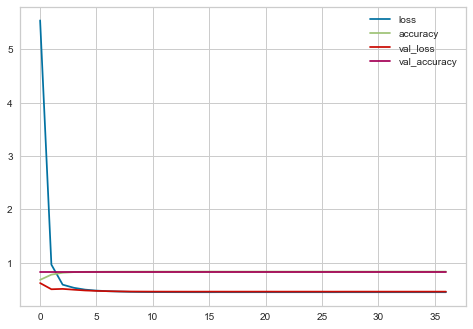

In [296]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [297]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)


loss :  0.44917118549346924
accuracy :  0.8340975642204285


#### Evaluating Model Performance and Tunning

In [298]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


75/75 [==============================] - 0s 1ms/step
[[2001    0]
 [ 398    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2001
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2399
   macro avg       0.42      0.50      0.45      2399
weighted avg       0.70      0.83      0.76      2399



Cross Validation

In [299]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [301]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=12, activation='relu'))
    classifier.add(Dense(units=6, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(
        optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [302]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=32, epochs=100, verbose=0)

scores = cross_validate(estimator=classifier_model, X=X_train, y=y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores


30/30 [==============================] - 0s 1ms/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.927083,0.852174,0.649007,0.736842
2,0.836458,0.589744,0.140244,0.226601
3,0.911366,0.691275,0.725352,0.707904
4,0.826903,0.000000,0.000000,0.000000
5,0.929093,0.774834,0.774834,0.774834
6,0.837331,0.000000,0.000000,0.000000
7,0.915537,0.782353,0.751412,0.766571
8,0.925965,0.778443,0.792683,0.785498
9,0.908238,0.698864,0.778481,0.736527
10,0.900938,0.725490,0.676829,0.700315


In [303]:
df_scores_summary = pd.DataFrame({"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
                                 index=["acc", "pre", "rec", "f1"])

df_scores_summary


,score_mean,score_std
acc,0.891891,0.041290
pre,0.589318,0.318341
rec,0.528884,0.337852
f1,0.543509,0.329867


## GridSearchCV

In [304]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam


In [305]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(tf.keras.metrics.Accuracy(name="accuracy", dtype=None))



In [306]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=26, activation='relu'))
    classifier.add(Dense(units=13, activation='relu'))
    classifier.add(Dense(units=7, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [307]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=15, restore_best_weights=True)


In [308]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, validation_split=0.1, epochs=200)


In [310]:
classifier_model.get_params()

{'validation_split': 0.1,
 'epochs': 200,
 'build_fn': <function __main__.build_classifier(optimizer, learn_rate)>}

In [312]:
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, Adadelta, Nadam],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator=classifier_model,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks=[early_stop])


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Epoch 1/200
243/243 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.7972 - val_loss: 0.6300 - val_accuracy: 0.8218
Epoch 2/200
243/243 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.8342 - val_loss: 0.5787 - val_accuracy: 0.8218
Epoch 3/200
243/243 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.8342 - val_loss: 0.5422 - val_accuracy: 0.8218
Epoch 4/200
243/243 [==============================] - 1s 2ms/step - loss: 0.5199 - accuracy: 0.8342 - val_loss: 0.5165 - val_accuracy: 0.8218
Epoch 5/200
243/243 [==============================] - 1s 3ms/step - loss: 0.4964 - accuracy: 0.8342 - val_loss: 0.4989 - val_accuracy: 0.8218
Epoch 6/200
243/243 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8342 - val_loss: 0.4868 - val_accuracy: 0.8218
Epoch 7/200
243/243 [==============================] - 0s 2ms/step - loss: 0.46

KeyboardInterrupt: 

In [ ]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


#### Prediction

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Comparing Models

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Gradient Boosting",  "KNN", "Random Forest", "XGBoost"],
                        "F1": [LOG_tuned_f1[0], Grad_tuned_f1[0], KNN_f1[0], pipe_rf_f1[0], xgb_f1[0]],
                        "Recall": [LOG_tuned_recall[0], Grad_tuned_recall[0], KNN_recall[0], pipe_rf_recall[0], xgb_recall[0]],
                        "ACC": [LOG_tuned_acc[0], Grad_tuned_acc[0], KNN_acc[0], pipe_rf_acc[0], xgb_acc[0], ]})


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show()


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___